In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 设置中文字体为宋体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置英文字体为新罗马
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False 

In [3]:
df1 = pd.read_csv('中间数据集\\按品类的日粒度时序数据集\\花菜类.csv')
df2 = pd.read_csv('中间数据集\\按品类的日粒度时序数据集\\花叶类.csv')
df3 = pd.read_csv('中间数据集\\按品类的日粒度时序数据集\\茄类.csv')
df4 = pd.read_csv('中间数据集\\按品类的日粒度时序数据集\\辣椒类.csv')
df5 = pd.read_csv('中间数据集\\按品类的日粒度时序数据集\\食用菌.csv')
df6 = pd.read_csv('中间数据集\\按品类的日粒度时序数据集\\水生根茎类.csv')

In [4]:
df6.head()

,日期,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率_品类,成本加成定价
0,2020-07-01,4.850,13.973333,8.820667,13.65,14.628103
1,2020-07-02,4.600,11.971429,7.458571,13.65,12.261741
2,2020-07-03,9.572,8.200000,5.610000,13.65,8.268220
3,2020-07-04,5.439,22.075000,14.190625,13.65,24.833594
4,2020-07-05,4.019,10.000000,5.420000,13.65,9.485000


In [5]:

name = ["花菜类", "花叶类", "茄类", "辣椒类", "食用菌", "水生根茎类"]

In [6]:
df1.head()

,日期,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率_品类,成本加成定价
0,2020-07-01,46.640,12.834951,8.484369,15.51,14.847646
1,2020-07-02,43.943,12.421053,7.832632,15.51,13.707105
2,2020-07-03,42.076,12.000000,7.583333,15.51,13.270833
3,2020-07-04,55.662,12.619048,8.220476,15.51,14.385833
4,2020-07-05,55.474,12.641509,8.442075,15.51,14.773632


# 预测成本的模型：Holt-Winters三重指数平滑模型（要把公式敲好）

In [7]:
df1['批发价格(元/千克)'] = df1['批发价格(元/千克)'].interpolate(method="linear", axis=0)
df2['批发价格(元/千克)'] = df2['批发价格(元/千克)'].interpolate(method="linear", axis=0)
df3['批发价格(元/千克)'] = df3['批发价格(元/千克)'].interpolate(method="linear", axis=0)
df4['批发价格(元/千克)'] = df4['批发价格(元/千克)'].interpolate(method="linear", axis=0)
df5['批发价格(元/千克)'] = df5['批发价格(元/千克)'].interpolate(method="linear", axis=0)
df6['批发价格(元/千克)'] = df6['批发价格(元/千克)'].interpolate(method="linear", axis=0)

In [8]:
import pandas as pd
import statsmodels.api as sm

# 假设df是包含时间序列数据的DataFrame，有一个名为"批发价"的列

# 创建并拟合Holt-Winters三重指数平滑模型
def hw_time(df1):
    # 创建Holt-Winters三重指数平滑模型
    model = sm.tsa.ExponentialSmoothing(df1['批发价格(元/千克)'], seasonal='add', seasonal_periods=4)

    # 拟合模型
    result = model.fit()

    # 预测未来的值，假设您想预测未来n个时间点的值
    n = 7  # 假设要预测未来10个时间点的值
    forecast = result.forecast(steps=n)
    
    return forecast

## 每类蔬菜的预测值输出

In [9]:
hw_time(df1)
hw_time(df2)
hw_time(df3)
hw_time(df4)
hw_time(df5)
hw_time(df6)

1095    12.610124
1096    12.516030
1097    12.724465
1098    12.551193
1099    12.610124
1100    12.516030
1101    12.724465
dtype: float64

In [10]:
pd.DataFrame({
    "花菜类": list(hw_time(df1)),
    "花叶类": list(hw_time(df2)),
    "茄类": list(hw_time(df3)),
    "辣椒类": list(hw_time(df4)),
    "食用菌": list(hw_time(df5)),
    "水生根茎类": list(hw_time(df6))
    }, index=["未来第1天", "未来第2天", "未来第3天", "未来第4天", "未来第5天", "未来第6天", "未来第7天"]
    ).to_excel('中间数据集\\未来七天成本预测结果.xlsx')

# 可视化证明预测结果可靠

# 以第一个为例就行了

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


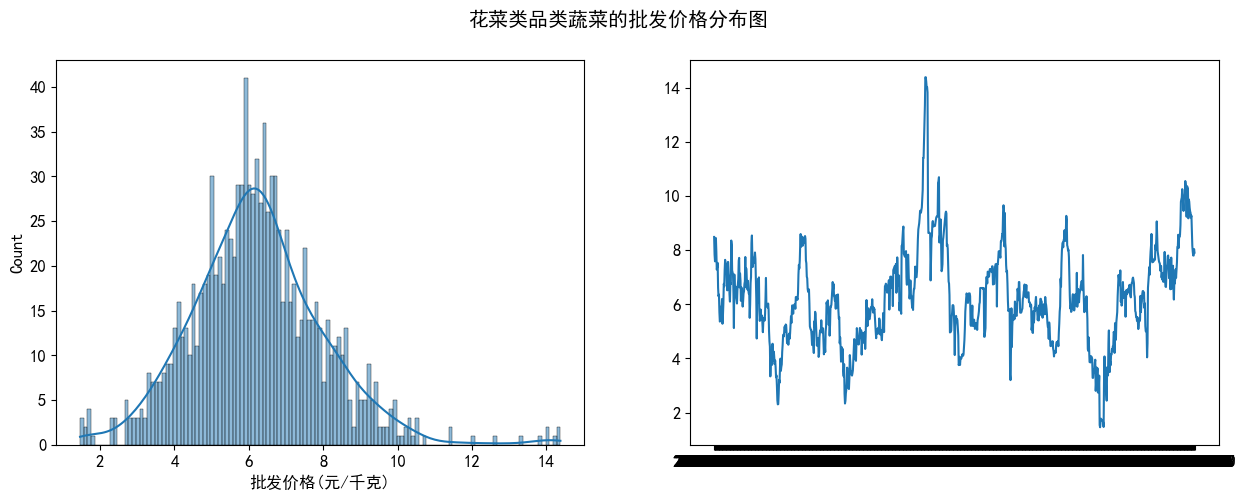

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('花菜类品类蔬菜的批发价格分布图')

sns.histplot(data=df1, x="批发价格(元/千克)", binwidth=0.1, kde=True, ax=ax[0])
ax[1].plot(df1["日期"], df1['批发价格(元/千克)'])

fig.savefig('图片\\2_3_未来成本预测结果测试-简单版.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


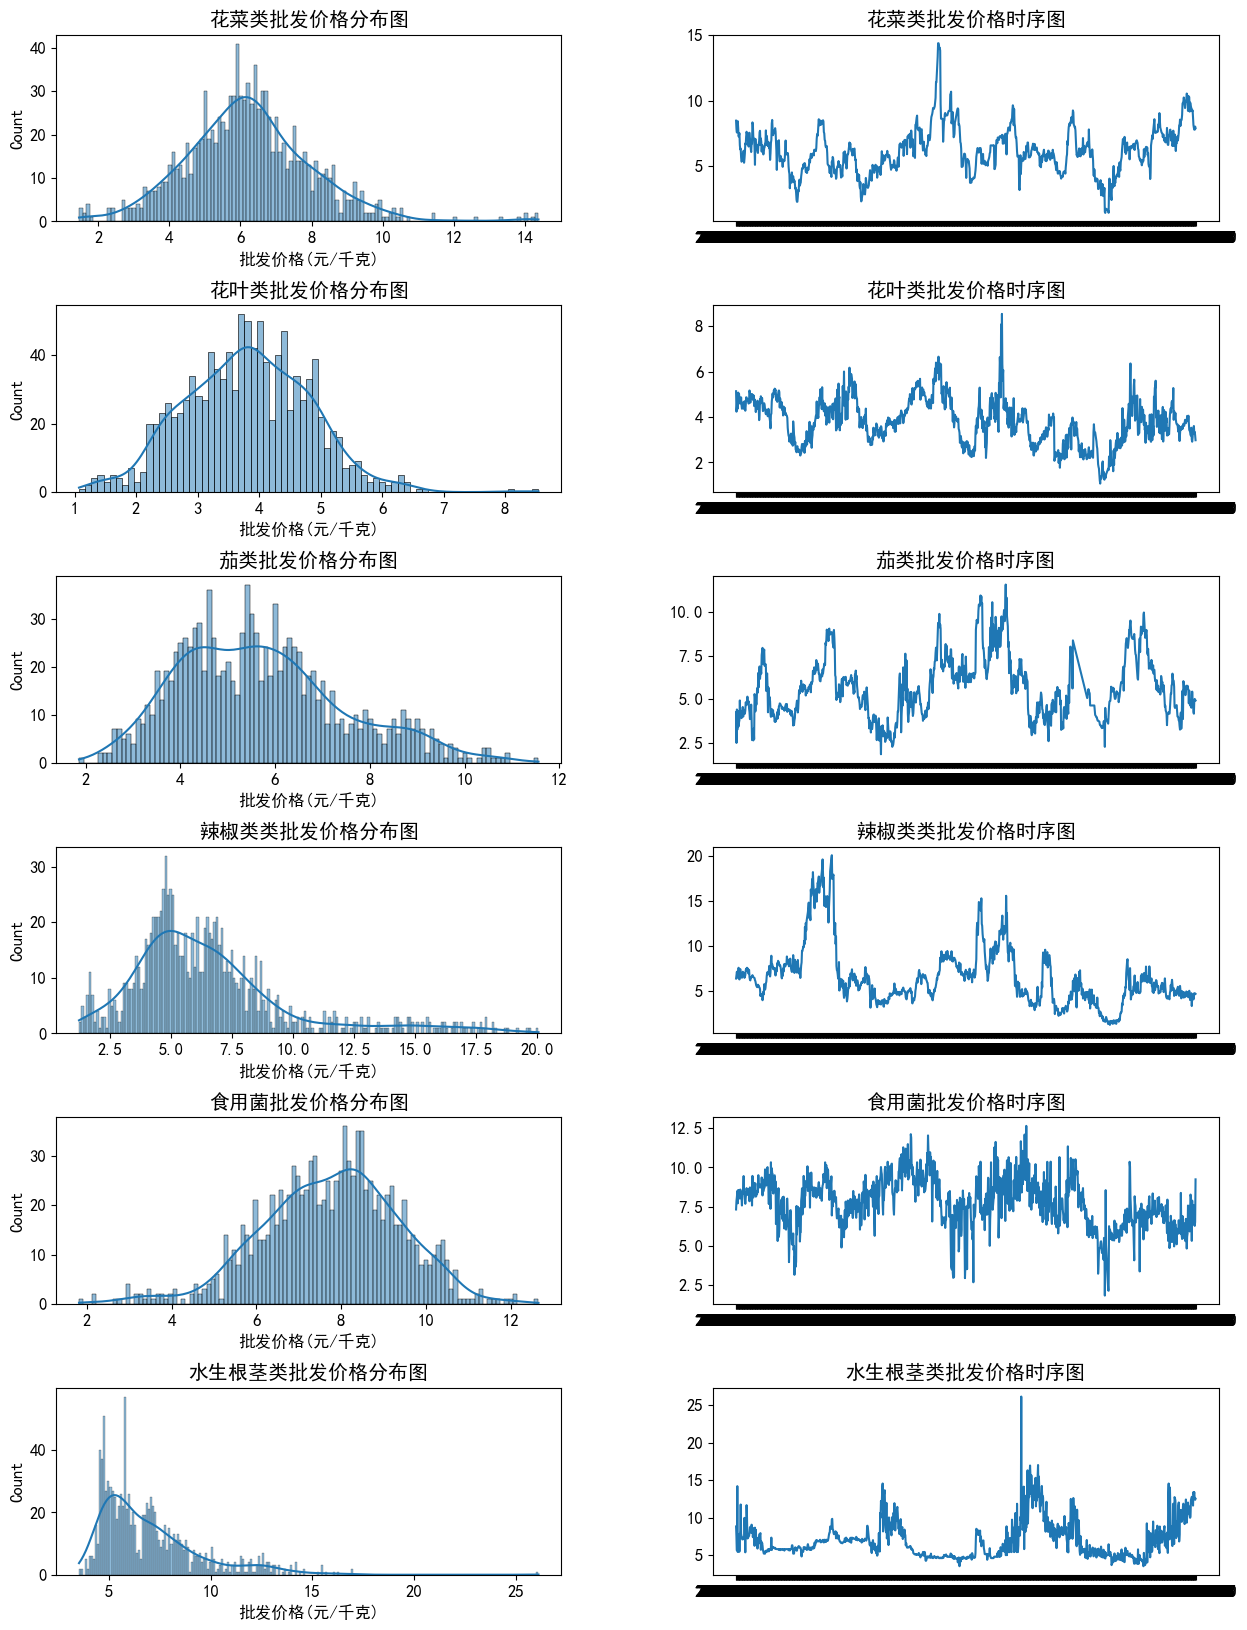

In [12]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
fig.subplots_adjust(wspace=0.3, hspace=0.45) 

sns.histplot(data=df1, x="批发价格(元/千克)", binwidth=0.1, kde=True, ax=ax[0][0])
ax[0][1].plot(df1["日期"], df1['批发价格(元/千克)'])

sns.histplot(data=df2, x="批发价格(元/千克)", binwidth=0.1, kde=True, ax=ax[1][0])
ax[1][1].plot(df2["日期"], df2['批发价格(元/千克)'])

sns.histplot(data=df3, x="批发价格(元/千克)", binwidth=0.1, kde=True, ax=ax[2][0])
ax[2][1].plot(df3["日期"], df3['批发价格(元/千克)'])

sns.histplot(data=df4, x="批发价格(元/千克)", binwidth=0.1, kde=True, ax=ax[3][0])
ax[3][1].plot(df4["日期"], df4['批发价格(元/千克)'])

sns.histplot(data=df5, x="批发价格(元/千克)", binwidth=0.1, kde=True, ax=ax[4][0])
ax[4][1].plot(df5["日期"], df5['批发价格(元/千克)'])

sns.histplot(data=df6, x="批发价格(元/千克)", binwidth=0.1, kde=True, ax=ax[5][0])
ax[5][1].plot(df6["日期"], df6['批发价格(元/千克)'])

ax[0][0].set_title("花菜类批发价格分布图")
ax[0][1].set_title("花菜类批发价格时序图")
ax[1][0].set_title("花叶类批发价格分布图")
ax[1][1].set_title("花叶类批发价格时序图")

ax[2][0].set_title("茄类批发价格分布图")
ax[2][1].set_title("茄类批发价格时序图")
ax[3][0].set_title("辣椒类类批发价格分布图")
ax[3][1].set_title("辣椒类类批发价格时序图")

ax[4][0].set_title("食用菌批发价格分布图")
ax[4][1].set_title("食用菌批发价格时序图")
ax[5][0].set_title("水生根茎类批发价格分布图")
ax[5][1].set_title("水生根茎类批发价格时序图")


fig.savefig('图片\\2_3_未来成本预测结果测试-完整版.eps')